
# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

LOADING  DATASET

In [2]:
df = pd.read_csv("/content/indian-ev-data.csv")

In [3]:
df.head(10)

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0
5,6,Tork T6X,Tork Motors,Bike,6.2,200,5.0,250000.0,25.0,100.0,2021.0
6,7,Revolt RV400,Revolt Motors,Bike,3.2,150,4.0,150000.0,20.0,85.0,2021.0
7,8,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
8,9,Ather 450X,Ather Energy,Scooter,2.9,116,4.5,149000.0,6.0,80.0,2021.0
9,10,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0


EDA

In [5]:
df.shape

(50, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      50 non-null     int64  
 1   Model                   50 non-null     object 
 2   Manufacturer            50 non-null     object 
 3   Vehicle Type            50 non-null     object 
 4   Battery Capacity (kWh)  50 non-null     float64
 5   Range per Charge (km)   50 non-null     int64  
 6   Charging Time           49 non-null     float64
 7   Price                   49 non-null     float64
 8   Power (HP or kW)        49 non-null     float64
 9   Top Speed (km/h)        49 non-null     float64
 10  Year of Manufacture     49 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.4+ KB


In [4]:
df.describe()

,id,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
count,50.00000,50.000000,50.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.50000,3.188000,120.160000,3.755102,120469.387755,6.795918,73.775510,2021.204082
std,14.57738,0.950325,30.370743,0.947158,46317.789078,6.570070,13.288882,0.499149
min,1.00000,2.200000,75.000000,2.500000,60000.000000,2.000000,50.000000,2020.000000
25%,13.25000,2.550000,100.000000,3.000000,85000.000000,3.000000,60.000000,2021.000000
50%,25.50000,2.900000,118.000000,3.500000,109000.000000,5.000000,80.000000,2021.000000
75%,37.75000,3.500000,140.000000,4.500000,149000.000000,6.000000,80.000000,2021.000000
max,50.00000,6.200000,200.000000,6.000000,250000.000000,25.000000,100.000000,2022.000000


In [5]:
df.isnull().sum()

,0
id,0
Model,0
Manufacturer,0
Vehicle Type,0
Battery Capacity (kWh),0
Range per Charge (km),0
Charging Time,1
Price,1
Power (HP or kW),1
Top Speed (km/h),1


In [6]:
# filling mean value in place of missing values in the dataset
df["Power (HP or kW)"] = df["Power (HP or kW)"].fillna(df["Power (HP or kW)"].mean())
df["Top Speed (km/h)"] = df["Top Speed (km/h)"].fillna(df["Top Speed (km/h)"].mean())
df["Year of Manufacture"] = df["Year of Manufacture"].fillna(df["Year of Manufacture"].mean())
df["Price"] = df["Price"].fillna(df["Price"].mean())
df["Charging Time"] = df["Charging Time"].fillna(df["Charging Time"].mean())

In [7]:
df.isnull().sum()

,0
id,0
Model,0
Manufacturer,0
Vehicle Type,0
Battery Capacity (kWh),0
Range per Charge (km),0
Charging Time,0
Price,0
Power (HP or kW),0
Top Speed (km/h),0


In [8]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [9]:
df.columns

Index(['id', 'Model', 'Manufacturer', 'Vehicle Type', 'Battery Capacity (kWh)',
       'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)',
       'Top Speed (km/h)', 'Year of Manufacture'],
      dtype='object')

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def convert_to_numerical(df):
    # Create a copy to avoid altering the original DataFrame
    df_numerical = df.copy()

    # Convert categorical columns to numerical using label encoding or one-hot encoding
    for col in df_numerical.columns:
        if df_numerical[col].dtype == 'object':  # Check if column is categorical (object type)
            # Apply Label Encoding if the column has two unique values
            if df_numerical[col].nunique() == 2:
                le = LabelEncoder()
                df_numerical[col] = le.fit_transform(df_numerical[col])
            else:
                # Apply One-Hot Encoding for columns with more than two categories
                df_numerical = pd.get_dummies(df_numerical, columns=[col], drop_first=True)

    # Handle missing values (optional, can be customized as needed)
    df_numerical.fillna(df_numerical.mean(), inplace=True)

    return df_numerical




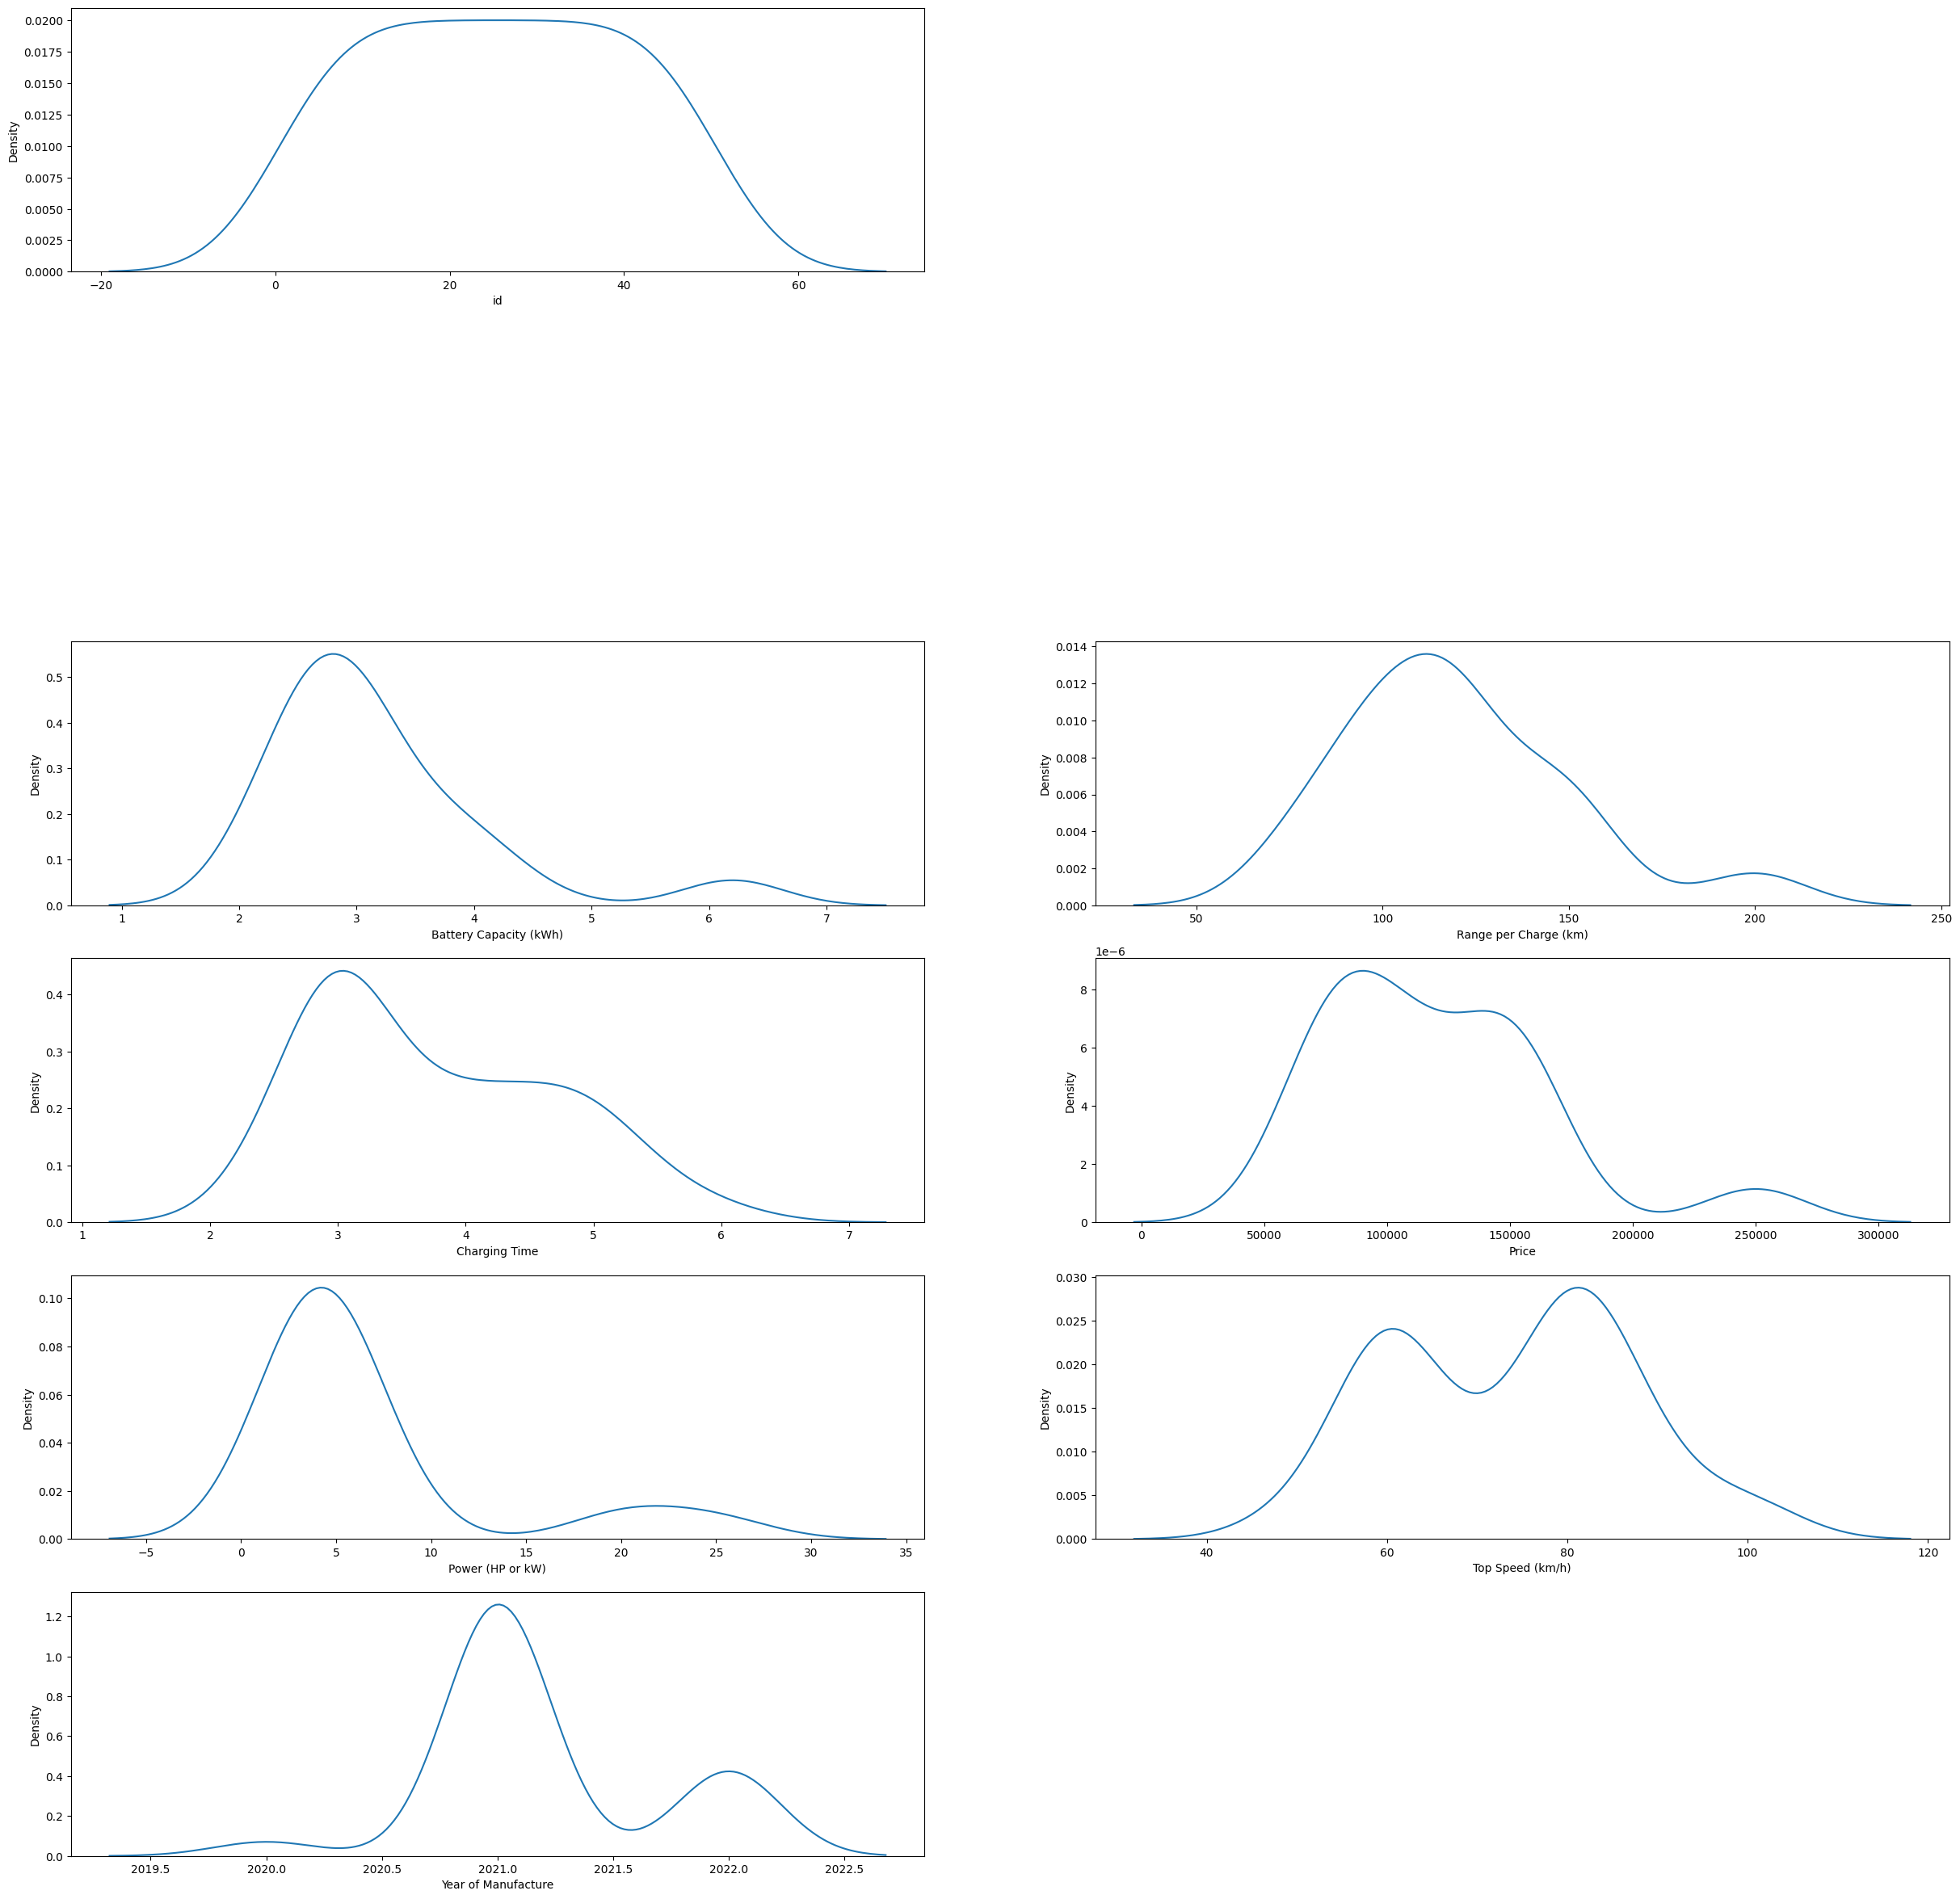

In [11]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

Skipping non-numeric column: Model
Skipping non-numeric column: Manufacturer
Skipping non-numeric column: Vehicle Type


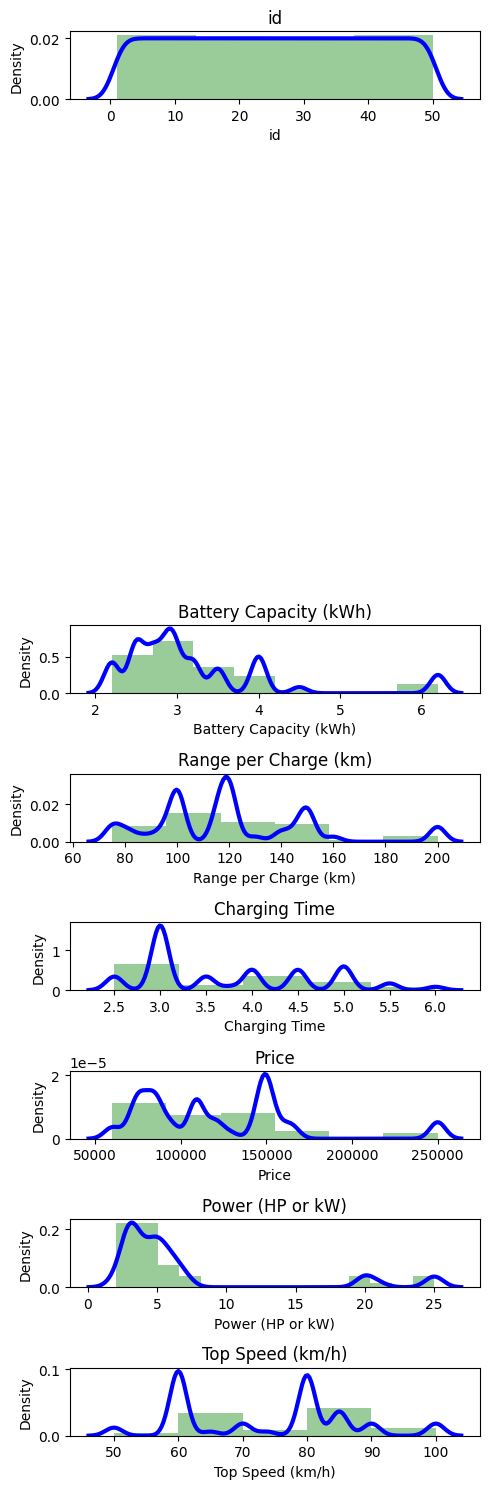

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
plt.figure(figsize=(5,15))

for i in range(0, 10):
    # Check if the column is numeric before plotting
    if pd.api.types.is_numeric_dtype(df[df.columns[i]]):
        plt.subplot(10, 1, i+1)
        sns.distplot(df[df.columns[i]], kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},
                     hist_kws={'color':'g'})
        plt.title(df.columns[i])
    else:
        print(f"Skipping non-numeric column: {df.columns[i]}")

plt.tight_layout()
plt.show()


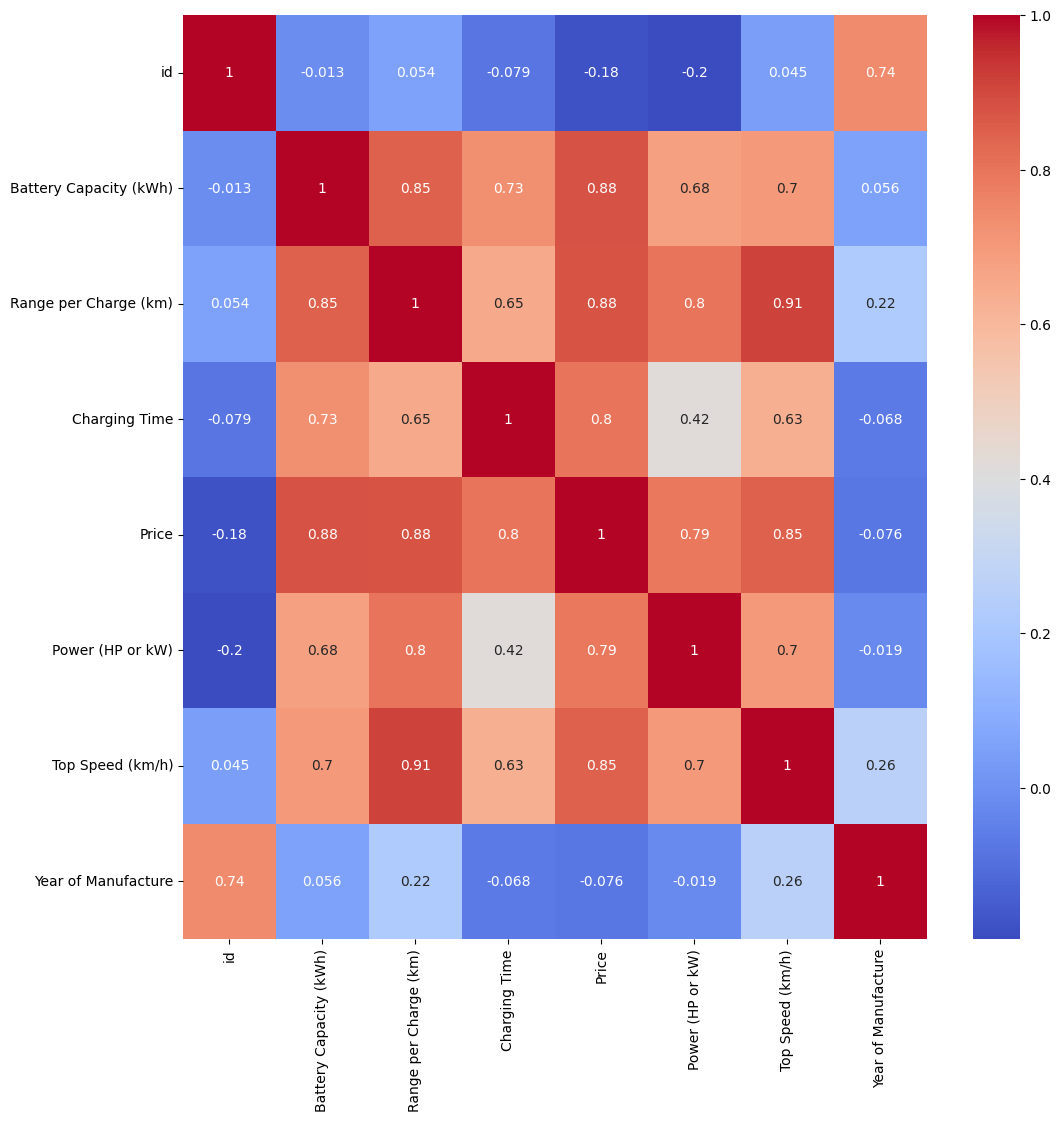

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

plt.show()


**scaling the dataframe**

In [17]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame
# Select only numeric columns for scaling
df_numeric = df.select_dtypes(include=['number'])

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the numeric columns
scaled_df_numeric = scaler.fit_transform(df_numeric)

# Optionally, convert the scaled array back to a DataFrame with the original column names
scaled_df_numeric = pd.DataFrame(scaled_df_numeric, columns=df_numeric.columns)

# If you want to retain non-numeric columns, you can concatenate them back:
df_non_numeric = df.select_dtypes(exclude=['number'])
scaled_df = pd.concat([scaled_df_numeric, df_non_numeric.reset_index(drop=True)], axis=1)

# Now `scaled_df` contains scaled numeric columns and untouched non-numeric columns


In [19]:
from sklearn.decomposition import PCA
import pandas as pd

# Ensure `scaled_df` only contains numeric columns
scaled_df_numeric = scaled_df.select_dtypes(include=['number'])

# Initialize PCA with the desired number of components
pca = PCA(n_components=2)

# Fit and transform the numeric data using PCA
principal_components = pca.fit_transform(scaled_df_numeric)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2"])

# Display the result
pca_df.head()


,PCA1,PCA2
0,0.371606,-1.469338
1,-0.494365,-1.219567
2,0.121483,-3.134283
3,-1.860499,-1.320237
4,-2.455380,-1.345755


# Hyperparameter tuning
## Finding 'k' value by Elbow Method

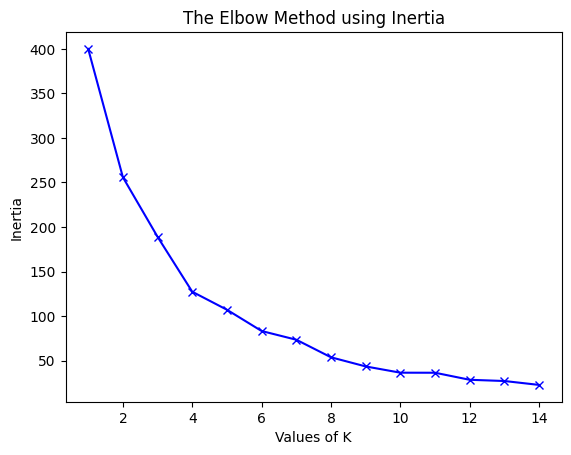

In [21]:
# Select only numeric columns
numeric_df = scaled_df.select_dtypes(include=[float, int])

inertia = []
range_val = range(1, 15)

for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(numeric_df))  # Fit on numeric columns only
    inertia.append(kmean.inertia_)

plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


# Model Building using KMeans

In [23]:
# Filter the DataFrame to include only numeric columns
numeric_df = scaled_df.select_dtypes(include=[float, int])

# Perform KMeans clustering
kmeans_model = KMeans(4)
kmeans_model.fit_predict(numeric_df)  # Fit on numeric columns only

# Add the cluster labels to the PCA DataFrame
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)

# View the result
pca_df_kmeans.head()


,PCA1,PCA2,cluster
0,0.371606,-1.469338,1
1,-0.494365,-1.219567,1
2,0.121483,-3.134283,1
3,-1.860499,-1.320237,0
4,-2.455380,-1.345755,0


# Visualizing the clustered dataframe

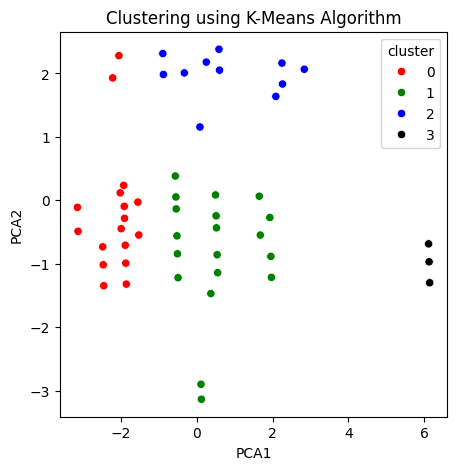

In [25]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [31]:
# Ensure the scaler was fitted properly
scalar = StandardScaler()
scaled_data = scalar.fit_transform(numeric_df)

# Get the cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_, columns=numeric_df.columns)

# Try inverse transforming the data to the original scale
try:
    cluster_centers = scalar.inverse_transform(cluster_centers)
except AttributeError:
    print("Scaler has no attribute 'scale_'. Ensure it was fitted correctly and standard scaling was used.")

# Convert cluster centers back to a DataFrame
cluster_centers = pd.DataFrame(data=cluster_centers, columns=numeric_df.columns)

# Display the cluster centers
cluster_centers


,id,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,-0.079486,-0.718807,-0.944448,-0.877054,-0.956560,-0.607949,-1.125762,-0.176735
1,-0.519719,-0.076756,0.113717,0.377320,0.323664,0.105287,0.377001,-0.632524
2,1.263075,0.370295,0.538944,0.337862,0.140837,-0.013546,0.539328,1.479483
3,-0.889297,3.201619,2.655535,1.341453,2.854230,2.827894,2.014109,-0.417290


In [32]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture,Cluster
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.500000,129000.000000,6.000000,80.00000,2021.000000,1
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.000000,109000.000000,5.000000,80.00000,2021.000000,1
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.000000,150000.000000,4.000000,60.00000,2020.000000,1
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.000000,85000.000000,3.000000,60.00000,2021.000000,0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.000000,75000.000000,3.000000,60.00000,2021.000000,0
5,6,Tork T6X,Tork Motors,Bike,6.2,200,5.000000,250000.000000,25.000000,100.00000,2021.000000,3
6,7,Revolt RV400,Revolt Motors,Bike,3.2,150,4.000000,150000.000000,20.000000,85.00000,2021.000000,1
7,8,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.000000,150000.000000,4.000000,60.00000,2020.000000,1
8,9,Ather 450X,Ather Energy,Scooter,2.9,116,4.500000,149000.000000,6.000000,80.00000,2021.000000,1
9,10,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.000000,109000.000000,5.000000,80.00000,2021.000000,1


In [33]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture,Cluster
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0,0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0,0
10,11,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0,0
11,12,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0,0
16,17,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0,0
17,18,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0,0
20,21,Ampere Reo,Ampere Vehicles,Scooter,3.0,100,3.5,80000.0,3.0,60.0,2021.0,0
21,22,Urbanite X1,Electric Vehicle Co.,Scooter,2.5,100,3.0,75000.0,3.0,60.0,2021.0,0
22,23,Joy e-Ride,Joy E-Bike,Bike,2.2,80,2.5,60000.0,2.0,50.0,2021.0,0
25,26,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0,0


In [34]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture,Cluster
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0,1
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0,1
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0,1
6,7,Revolt RV400,Revolt Motors,Bike,3.2,150,4.0,150000.0,20.0,85.0,2021.0,1
7,8,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0,1
8,9,Ather 450X,Ather Energy,Scooter,2.9,116,4.5,149000.0,6.0,80.0,2021.0,1
9,10,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0,1
13,14,Revolt RV400,Revolt Motors,Bike,3.2,150,4.0,150000.0,20.0,85.0,2021.0,1
14,15,Ather 450X,Ather Energy,Scooter,2.9,116,4.5,149000.0,6.0,80.0,2021.0,1
15,16,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0,1


In [35]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture,Cluster
37,38,Revolt RV400,Revolt Motors,Bike,3.2,150,4.000000,155000.000000,21.000000,85.00000,2022.000000,2
38,39,Ather 500X,Ather Energy,Scooter,4.0,150,5.000000,165000.000000,7.000000,90.00000,2022.000000,2
39,40,Pure EV Epluto 8G,Pure EV,Scooter,3.5,140,3.500000,120000.000000,5.000000,85.00000,2022.000000,2
40,41,Okinawa iPraise Pro X,Okinawa Autotech,Scooter,3.0,120,3.000000,95000.000000,4.000000,70.00000,2022.000000,2
42,43,Ampere Zeo,Ampere Vehicles,Scooter,3.5,120,4.000000,90000.000000,4.000000,70.00000,2022.000000,2
43,44,Bajaj Chetak EV Plus,Bajaj Auto,Scooter,4.5,160,6.000000,160000.000000,5.000000,90.00000,2022.000000,2
44,45,Urbanite X2,Electric Vehicle Co.,Scooter,3.2,130,4.000000,110000.000000,5.000000,80.00000,2022.000000,2
45,46,Ather 500X,Ather Energy,Scooter,4.0,150,5.000000,165000.000000,7.000000,90.00000,2022.000000,2
46,47,Pure EV Epluto 8G,Pure EV,Scooter,3.5,140,3.500000,120000.000000,5.000000,85.00000,2022.000000,2
47,48,Okinawa iPraise Pro X,Okinawa Autotech,Scooter,3.0,120,3.000000,95000.000000,4.000000,70.00000,2022.000000,2


In [36]:
cluster_4_df = cluster_df[cluster_df["Cluster"] == 3]
cluster_4_df

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture,Cluster
5,6,Tork T6X,Tork Motors,Bike,6.2,200,5.0,250000.0,25.0,100.0,2021.0,3
12,13,Tork T6X,Tork Motors,Bike,6.2,200,5.0,250000.0,25.0,100.0,2021.0,3
18,19,Tork T6X,Tork Motors,Bike,6.2,200,5.0,250000.0,25.0,100.0,2021.0,3


<Axes: xlabel='Cluster', ylabel='count'>

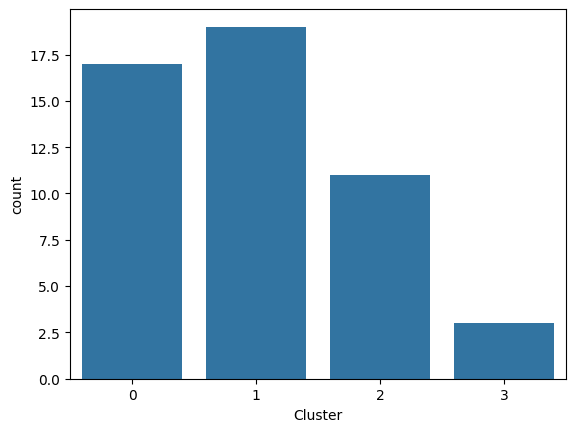

In [37]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)

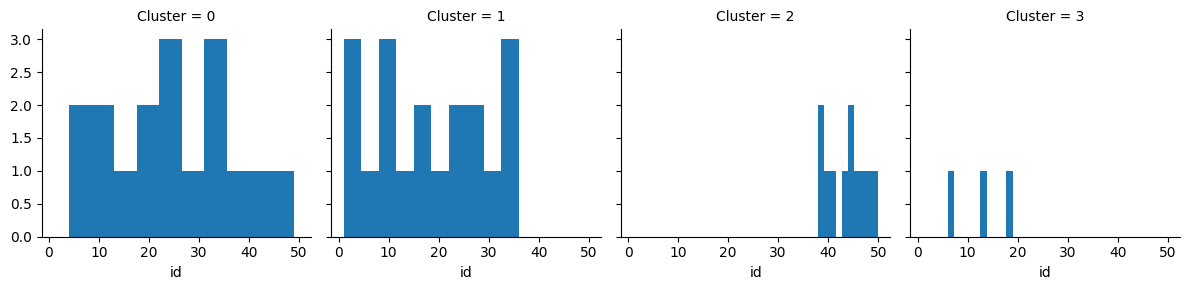

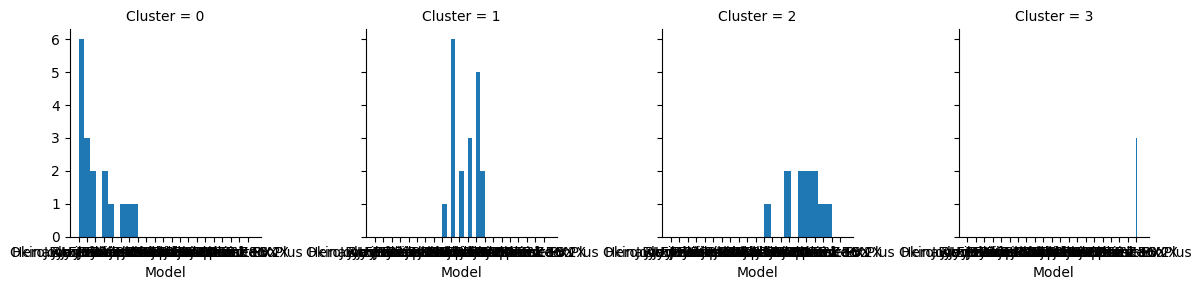

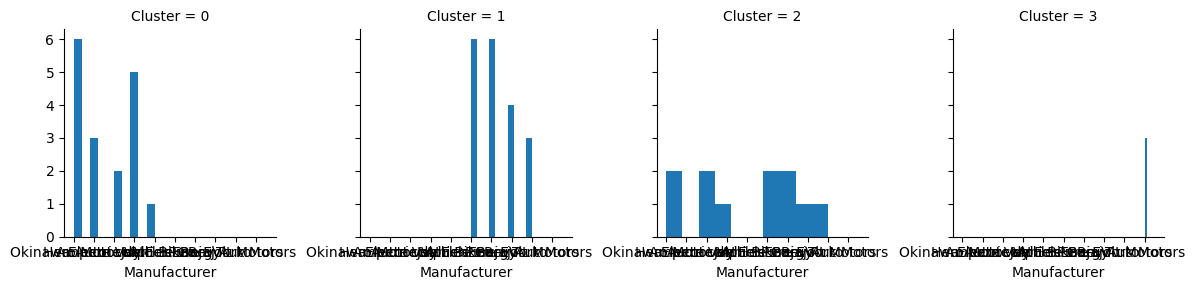

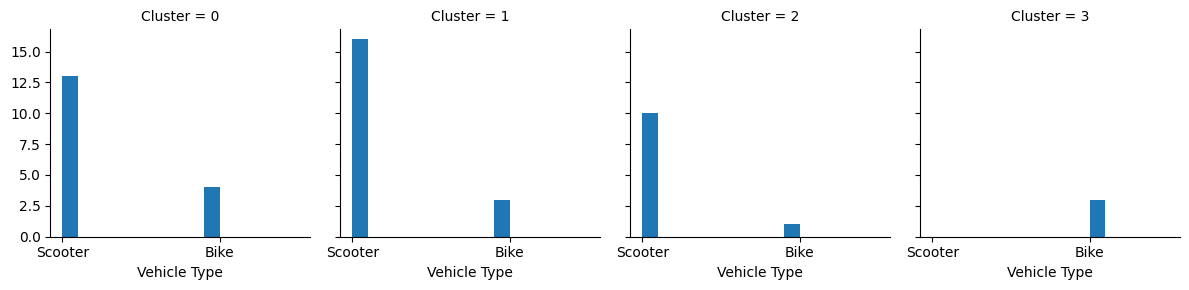

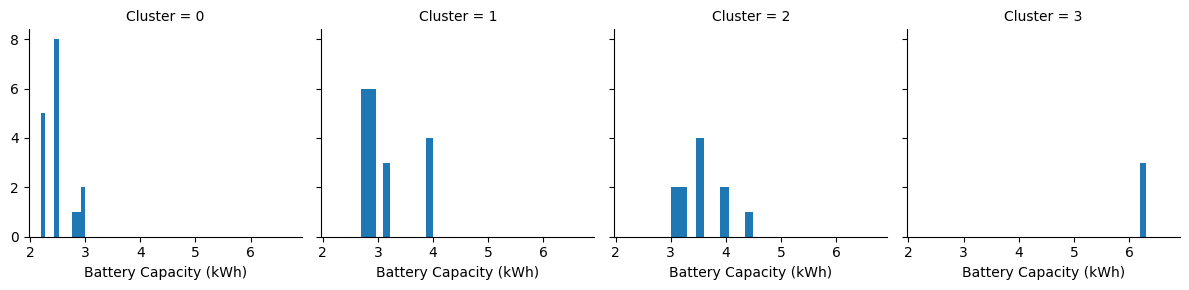

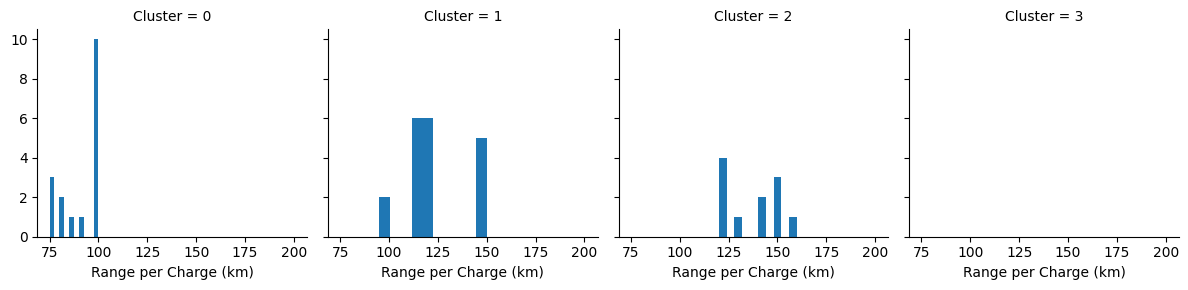

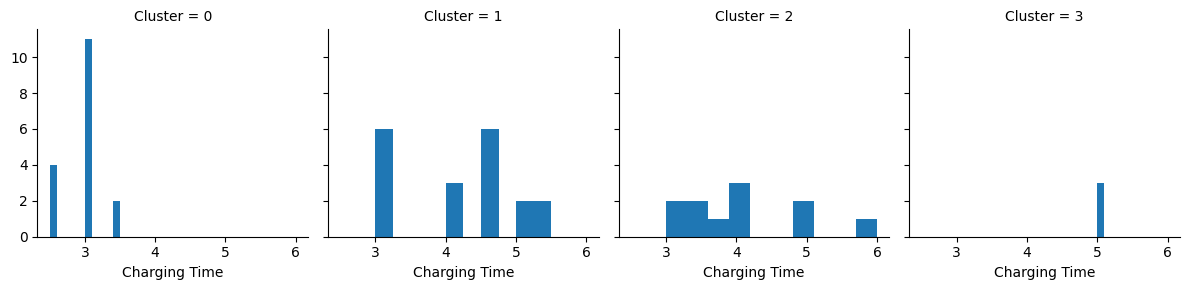

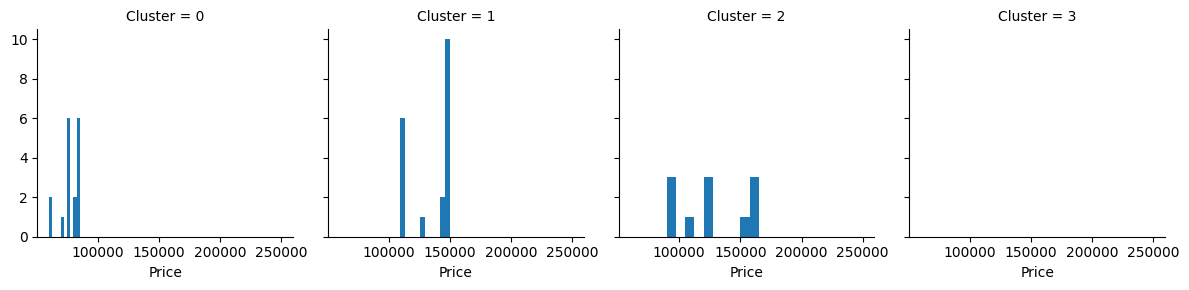

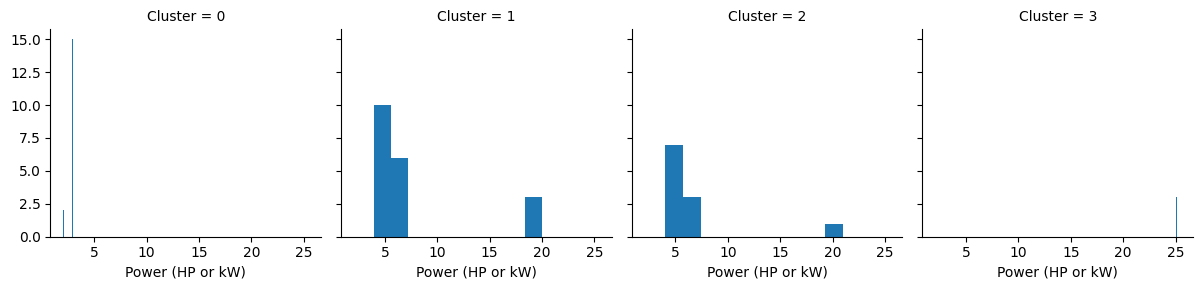

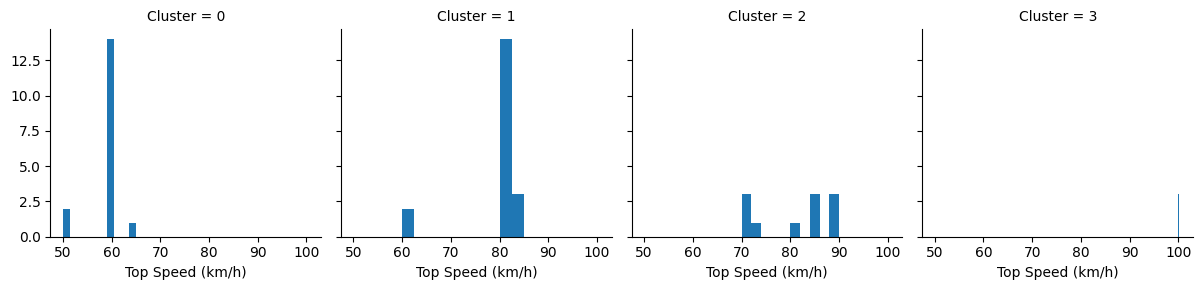

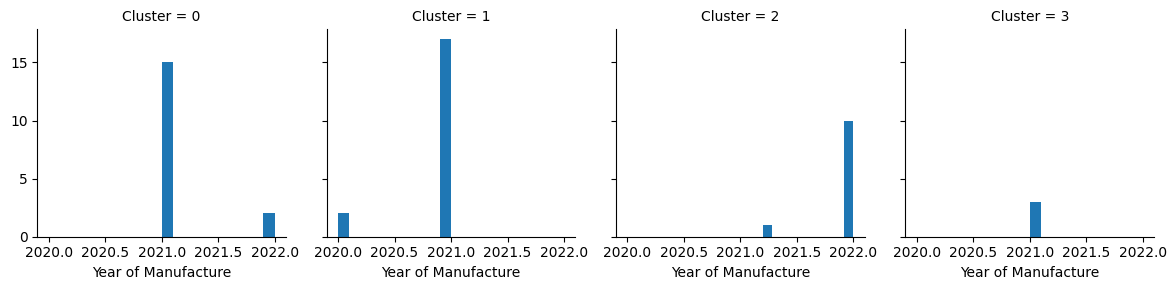

In [38]:

for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

# Saving the kmeans clustering model and the data with cluster label

In [39]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [40]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

# Training and Testing the model accuracy using decision tree

In [41]:
#Split Dataset
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)


In [42]:
X_train

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
35,36,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.000000,109000.000000,5.000000,80.00000,2021.000000
49,50,Ampere Zeo,Ampere Vehicles,Scooter,3.5,120,3.755102,120469.387755,6.795918,73.77551,2021.204082
17,18,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.000000,75000.000000,3.000000,60.00000,2021.000000
41,42,Joy E-Bike Urbanite X2,Electric Vehicle Co.,Bike,2.8,90,2.500000,70000.000000,3.000000,60.00000,2022.000000
39,40,Pure EV Epluto 8G,Pure EV,Scooter,3.5,140,3.500000,120000.000000,5.000000,85.00000,2022.000000
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.000000,109000.000000,5.000000,80.00000,2021.000000
44,45,Urbanite X2,Electric Vehicle Co.,Scooter,3.2,130,4.000000,110000.000000,5.000000,80.00000,2022.000000
13,14,Revolt RV400,Revolt Motors,Bike,3.2,150,4.000000,150000.000000,20.000000,85.00000,2021.000000
15,16,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.000000,109000.000000,5.000000,80.00000,2021.000000
29,30,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.000000,85000.000000,3.000000,60.00000,2021.000000


In [43]:
X_test

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
9,10,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
48,49,Joy E-Bike Urbanite X3,Electric Vehicle Co.,Bike,2.9,85,2.5,75000.0,3.0,65.0,2022.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
21,22,Urbanite X1,Electric Vehicle Co.,Scooter,2.5,100,3.0,75000.0,3.0,60.0,2021.0
38,39,Ather 500X,Ather Energy,Scooter,4.0,150,5.0,165000.0,7.0,90.0,2022.0
45,46,Ather 500X,Ather Energy,Scooter,4.0,150,5.0,165000.0,7.0,90.0,2022.0
28,29,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
20,21,Ampere Reo,Ampere Vehicles,Scooter,3.0,100,3.5,80000.0,3.0,60.0,2021.0
7,8,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
34,35,Ather 450X,Ather Energy,Scooter,2.9,116,4.5,149000.0,6.0,80.0,2021.0


In [46]:
#decision tree

In [47]:
# Adjust the split to ensure all labels are in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
